In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import pickle
%matplotlib notebook

from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA
from plsa.preprocessors import tokenize


In [2]:
# csv_file = '../data/my/lyrics_src_shufflue.csv'
with open("../data/my/AV.pkl", "rb") as file:
    AV_dict = pickle.load(file)
AV_dict

# df = pd.read_csv('../data/graduation_data/raw_AV.csv')
# arousal_row = df["Lyrics_Arousal"]
# arousal_list = list(arousal_row)
# valence_row = df["Lyrics_Valence"]
# valence_list = list(valence_row)

{'知る': [0.13480748664061026, 0.13559650587355243],
 '変わる': [-0.0002806238584588032, 0.0004903674812777369],
 '行く': [-0.0003084258801702678, 0.0003673040874458614],
 '変える': [-0.00020054758977613188, 0.0004145393360906907],
 'くも': [0.0005335309452343614, -0.0005335309452343614],
 'まっさら': [0.0005335309452343613, -0.0005335309452343613],
 '理想': [0.38302821619529825, -0.3832503218931319],
 '受け止める': [-0.00010245181911106943, 0.000443962050786073],
 '選ぶ': [-0.00023859624643869475, 0.0001337473709747844],
 '明日へ': [-0.00045008140515250114, 0.0007929375236151031],
 '伸ばす': [-0.0001682858425037855, 0.00028275418588627417],
 '向く': [-0.0007564256658203055, 0.001030083415785113],
 '行ける': [3.789221653127462e-05, 0.00011743744441055686],
 '迷う': [-0.0001919244124242907, 0.0003742521800204143],
 '理由': [-0.0001339762830766898, 0.0003157647558928459],
 '踏み出せる': [-0.00015964246601926537, 0.00015851809108629775],
 '素直': [-0.8164757556652233, -0.8161802284572663],
 '笑える': [-0.00047535275587635474, 0.000708564

In [3]:
with open("../data/my/texts.pkl", "rb") as file:
    texts = pickle.load(file)
texts[0]

[[],
 ['知る'],
 [],
 [],
 ['変わる', '行く'],
 ['変える', 'くも'],
 ['まっさら', '理想', '受け止める'],
 ['選ぶ', '明日へ'],
 ['伸ばす'],
 [],
 ['向く', '行ける'],
 ['迷う'],
 ['理由', '踏み出せる'],
 [],
 ['素直', '笑える'],
 ['涙', '許せる'],
 ['言葉', '満たす'],
 ['小さい', '感じる', '部屋'],
 ['足りる'],
 ['新しい世界'],
 [],
 ['知る'],
 [],
 [],
 ['変わる', '行く'],
 ['変える', 'くも'],
 ['始まり', '終わる', '繰り返す'],
 ['自分らしさ', '意味', '気付く'],
 ['クリエイト'],
 ['昨日', '脱ぐ', 'いく'],
 ['おろす', 'たて', 'パンツ'],
 ['お気に入り', 'シャツ'],
 ['袖', '通す', '出発'],
 ['探す', '有る', '筈'],
 [],
 ['もっと強く', '行ける'],
 ['優しい'],
 ['想い', '貫ける'],
 [],
 ['弱い', '見せる'],
 ['愛せる'],
 ['答え', '頷ける'],
 ['大きい', '感じる', '空'],
 ['待つ'],
 ['新しい', '未来', '始まる'],
 [],
 ['知る'],
 [],
 [],
 ['変わる', '行く'],
 ['変える', 'くも'],
 ['まっさら', '理想', '受け止める'],
 ['選ぶ', '明日へ'],
 ['伸ばす']]

In [4]:
detail_AV = []
detail_AV_dict = []
a_list = []
v_list = []
word_list = []
for lyric in texts:
    phrase_AV = []
    phrase_AV_dict = {}
    for phrase in lyric:
        if len(phrase) == 0:
            pass
        else:
            a = 0
            v = 0
            for word in phrase:
                try:
                    a += AV_dict[word][0]
                    v += AV_dict[word][1]
                except KeyError:
                    pass
            arousal = a/len(phrase)
            valence = v/len(phrase)
            phrase_AV.append([arousal,valence])
            a_list.append(arousal)
            v_list.append(valence)
            word_list.append(' '.join(phrase))
            phrase_AV_dict[' '.join(phrase)] = [arousal,valence]
    detail_AV.append(phrase_AV)
    detail_AV_dict.append(phrase_AV_dict)
detail_AV

[[[0.13480748664061026, 0.13559650587355243],
  [-0.0002945248693145355, 0.00042883578436179917],
  [0.00016649167772911477, -5.9495804571835356e-05],
  [0.12781976510714052, -0.12777996359586005],
  [-0.00034433882579559794, 0.00046334244729494376],
  [-0.0001682858425037855, 0.00028275418588627417],
  [-0.0003592667246445154, 0.0005737604300978349],
  [-0.0001919244124242907, 0.0003742521800204143],
  [-0.0001468093745479776, 0.00023714142348957182],
  [-0.4084755542105499, -0.40773583179033845],
  [0.00020342685593307579, 0.00010552854634620441],
  [0.18098585181293952, -0.1807198001981089],
  [-0.32811535412203674, 0.3283800559984343],
  [-0.0002550104888717754, 0.00037194779636089056],
  [-0.0014385187074544576, 0.0007136061939171981],
  [0.13480748664061026, 0.13559650587355243],
  [-0.0002945248693145355, 0.00042883578436179917],
  [0.00016649167772911477, -5.9495804571835356e-05],
  [0.0915701125559944, 0.09217781848695107],
  [0.09288910673294892, -0.09264000713466843],
  [-0.

In [17]:
detail_AV[2580]

[[-0.00047089859559951223, 0.0004919276650833523],
 [-0.0005763396758359553, 0.0006618014518660571],
 [-5.551137631199561, -5.5522046930900295],
 [-5.551137631199561, -5.5522046930900295],
 [0.0005335309452343613, -0.0005335309452343613],
 [0.0005335309452343614, -0.0005335309452343614],
 [17.947064464522015, 17.945997402631548],
 [8.596482849499814e-06, 6.999648458695995e-05],
 [-0.2690222126129856, -0.2688909656231403],
 [-5.551137631199561, -5.5522046930900295],
 [-5.551137631199561, -5.5522046930900295],
 [0.00025184091678142245, -0.00014539236074518459],
 [0.00025184091678142245, -0.00014539236074518459],
 [0.0005335309452343613, -0.0005335309452343613],
 [23.394998490277597, -23.394998490277597],
 [18.309195760714466, 18.309046351190638],
 [2.5548636503816207, 2.5566444493545024],
 [0.0005335309452343614, -0.0005335309452343614],
 [0.0004799979049875091, -0.00023137668865830615]]

In [8]:
_df["cls"] = label
_df.to_csv("../data/my/four_word_AV.csv")

In [9]:
import seaborn as sns
sns.scatterplot(x='v', y='a', hue='cls', data=_df)

<AxesSubplot:xlabel='v', ylabel='a'>

-0.03902710468087122 -0.023473520218363787
29


<IPython.core.display.Javascript object>


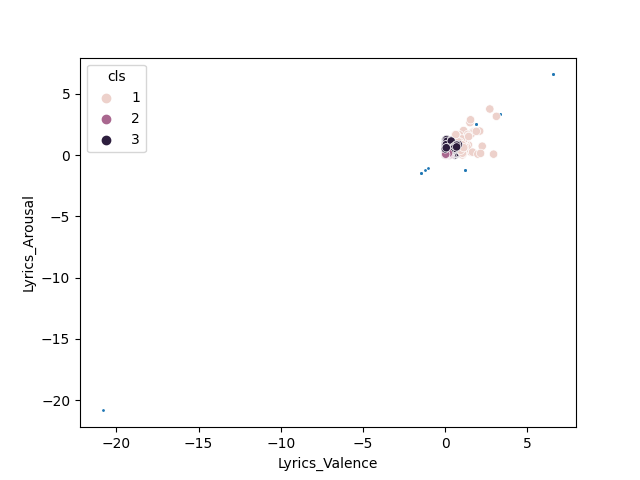

{'買い被る': [-0.0006228519190665841, -0.0006228519190665841],
 '高い 評価': [3.325469201847129, 3.3263249456285195],
 '内容 薄い 反吐 出る': [2.550379643788533, 1.890697766885391],
 '踊る': [-0.0006251527850884289, 0.00042808303716602037],
 '醜い 笑い絵': [-1.4582645956962432, -1.4548988066229465],
 '気づく 無位 いう': [0.06896939609725114, -0.06890075206679978],
 '壊す': [-1.074359529820718, -1.0732428569064103],
 '昨今 鼻': [-20.846441435532018, -20.845560035139012],
 '虫唾が走る': [-0.0006228519190665841, -0.0006228519190665841],
 '愚か': [-1.4840609987538371, -1.4838830246866832],
 '阿呆面': [-0.0006228519190665841, -0.0006228519190665841],
 '吹く こむ': [9.338265999686415e-05, 6.9710470012166104e-06],
 '意気込む': [-0.0002373928115719093, -0.0005930784038089561],
 '生命 色 憎い': [0.3803418728335442, -0.12037500907719413],
 '運ぶ': [-0.0007008869258055552, 0.0006161913277341277],
 '無神経 育つ 嫌う': [0.17385615341699132, -0.1740682918811767],
 '気持ちいい': [-0.0009249068821709843, 0.0005359792419409616],
 'そりゃそうだ ろ': [-0.0005583700800182848, -0.000

In [15]:
# a_list = []
# v_list = []
# lyric = 616

# for data in detail_AV[lyric]:
#     a_list.append(data[0])
#     v_list.append(data[1])
# a_mean = sum(a_list)/len(detail_AV[lyric])
# v_mean = sum(v_list)/len(detail_AV[lyric])
# print(a_mean,v_mean)
# print(len(detail_AV_dict[lyric]))
# plt.scatter(v_list,a_list,s=1)
# detail_AV_dict[lyric]

606

In [51]:
pipeline = Pipeline(tokenize)
corpus = Corpus.from_csv(csv_file, pipeline,col=-1, encoding="utf-8", max_docs=3000)
corpus

Corpus:
Number of documents: 3000
Number of words:     19896

In [52]:
corpus.raw

('知る 変わる 行く 変える くも まっさら 理想 受け止める 選ぶ 明日へ 伸ばす 向く 行ける 迷う 理由 踏み出せる 素直 笑える 涙 許せる 言葉 満たす 小さい 感じる 部屋 足りる 新しい世界 知る 変わる 行く 変える くも 始まり 終わる 繰り返す 自分らしさ 意味 気付く クリエイト 昨日 脱ぐ いく おろす たて パンツ お気に入り シャツ 袖 通す 出発 探す 有る 筈 もっと強く 行ける 優しい 想い 貫ける 弱い 見せる 愛せる 答え 頷ける 大きい 感じる 空 待つ 新しい 未来 始まる 知る 変わる 行く 変える くも まっさら 理想 受け止める 選ぶ 明日へ 伸ばす ',
 '勝負 勝負 勝負 出ろ 勝負 行く カラダ 勝負 勝負 勝負 出ろ 止む 雨 勝負 勝負 勝負 出ろ 陽気 行く 勝負 勝負 勝負 出ろ 明ける 夜 乗り越える なさる 幸 悲しい 言葉 換える 星 見上げる 歌う いい 生まれる 出逢う 多事 幸せ 夢 叶う 愛 受け止める 勝負 勝負 勝負 出ろ 勝負 行く カラダ 勝負 勝負 勝負 出ろ 止む 雨 当たり前 アロエ 世の中 生きる 限り ひとりひとり 違う いい 人間 ひとは 弱い 暗い 寂しい 女神 微笑む でる 枯れる 花 甦る 勝負 勝負 勝負 出ろ 勝負 行く カラダ 勝負 勝負 勝負 出ろ 止む 雨 勝負 勝負 勝負 出ろ 陽気 行く 勝負 勝負 勝負 出ろ 明ける 夜 ドキドキ ワナワナ 助ける 助ける 杏仁豆腐 ジャージャー麺 食う 食べる ちょ ちょ ワイルド 行幸 いい ちょ ちょ ガンバ 乗り越える なさる 幸 勝負 勝負 勝負 出ろ 勝負 行く カラダ 勝負 勝負 勝負 出る 跳べる 壁 勝負 勝負 勝負 出ろ 陽気 行く 勝負 勝負 勝負 出ろ 空振り ',
 '白い ホーム ビル 影 蒼い ひろがる ベル 鳴り響く 九月 夕暮れ 人波 流れる 街 灯り ともる 西早稲田 通り うつむく 別れ ふりむく 独り言 愛してる いつまでも 明日 寂しい ギター 弾く 煙草 けむる キャバレー 聞く 悲しい 気持ち 作り笑い 陰 ため息 髪 長ける 恋 唄 聴ける 恋しい お願いだから 電車 遅らせる 夜 街 歩く 聞く 悲しい 気持ち 言葉 ',
 '煙 吐き出す 喉 刺さる 悲しみ 言

In [4]:
# tf = corpus.get_doc_word(False) # Term Frequency
# number_of_all_words = corpus.n_occurrences # 全単語の出現回数
# number_of_occurances = tf * number_of_all_words # 全文書における単語wの出現回数
# number_of_occurances = number_of_occurances.astype(np.int64) # numpy.float64 => numpy.int64
# number_of_occurances.shape

In [5]:
# lyrics_A_list = []
# lyrics_V_list = []
# i = 0
# for num_of_dw in number_of_occurances:
#     lyrics_A_list.append(arousal_list[i]/sum(num_of_dw))
#     lyrics_V_list.append(valence_list[i]/sum(num_of_dw))
#     i += 1

In [6]:
# from sklearn.preprocessing import MinMaxScaler

# a_scaler = MinMaxScaler((-1,1))
# a_scaler.fit(np.array(lyrics_A_list).reshape(-1,1))
# a_scaled = a_scaler.transform(np.array(lyrics_A_list).reshape(-1,1))
# a_scaled = np.ravel(a_scaled)

# v_scaler = MinMaxScaler((-1,1))
# v_scaler.fit(np.array(lyrics_V_list).reshape(-1,1))
# v_scaled = v_scaler.transform(np.array(lyrics_V_list).reshape(-1,1))
# v_scaled = np.ravel(v_scaled)

In [7]:
# raw_AV_df = pd.DataFrame([list(lyrics_A_list), list(lyrics_V_list)], index=["Lyrics_Arousal","Lyrics_Valence"])
# raw_AV_df.T.to_csv("../data/my/raw_AV.csv")
# result_df = pd.DataFrame([list(a_scaled),list(v_scaled)], index=["Lyrics_Arousal","Lyrics_Valence"])
# result_df.T.to_csv("../data/my/AV.csv")

In [8]:
# plt.figure(figsize=(10,10))
# plt.scatter(list(lyrics_A_list), list(lyrics_V_list),s=1)

In [3]:
raw_AV_df = pd.read_csv("../data/my/research.csv",index_col=3)
# raw_AV_df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Id', 'Artist', 'Lyricist', 'Composer',
#        'Lyric', 'danceability', 'energy', 'key', 'loudness', 'mode',
#        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#        'valence', 'tempo', 'type', 'uri', 'track_href', 'analysis_url',
#        'duration_ms', 'time_signature', 'lyrics_src'], inplace=True)



,Unnamed: 0,Unnamed: 0.1,Id,Artist,Lyricist,Composer,Lyric,danceability,energy,key,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,lyrics_src,Lyrics_Arousal,Lyrics_Valence
Song,,,,,,,,,,,,,,,,,,,,,
good day,1179,1179,1179,AAA,leonn・Rap詞: Mitsuhiro Hidaka,Kazuhito Kikuchi,We've got a good day good smile きっと 君はもう知ってるはず...,0.565,0.936,1.0,...,129.943,audio_features,spotify:track:64uJBWKA9uX8E4PQKpHM9v,https://api.spotify.com/v1/tracks/64uJBWKA9uX8...,https://api.spotify.com/v1/audio-analysis/64uJ...,330867.0,4.0,知る 変わる 行く 変える くも まっさら 理想 受け止める 選ぶ 明日へ 伸ばす 向く 行...,-0.023002,-0.018030
アロエ,2103,2103,2103,サザンオールスターズ,桑田佳祐,桑田佳祐,だから勝負、勝負、勝負出ろ！！ 勝負に行こう！！ カラダ勝負、勝負、勝負出ろ！！ 止まない雨...,0.483,0.952,7.0,...,135.941,audio_features,spotify:track:3VFIQ4mCOtE9urUGLDyCjU,https://api.spotify.com/v1/tracks/3VFIQ4mCOtE9...,https://api.spotify.com/v1/audio-analysis/3VFI...,299867.0,4.0,勝負 勝負 勝負 出ろ 勝負 行く カラダ 勝負 勝負 勝負 出ろ 止む 雨 勝負 勝負 勝...,0.249835,-0.017010
恋の西武新宿線,6310,6310,6310,浜田省吾,浜田省吾,浜田省吾,白いホームにビルの影が 蒼くひろがりベルが鳴り響く 九月の夕暮れ人波流れる 街灯りともる西早...,0.655,0.536,2.0,...,118.057,audio_features,spotify:track:0vDndbci2VWRJkKJFOk5cC,https://api.spotify.com/v1/tracks/0vDndbci2VWR...,https://api.spotify.com/v1/audio-analysis/0vDn...,258960.0,4.0,白い ホーム ビル 影 蒼い ひろがる ベル 鳴り響く 九月 夕暮れ 人波 流れる 街 灯り...,0.786711,0.686031
スプーンと汗,6626,6626,6626,サカナクション,Ichiro Yamaguchi,Ichiro Yamaguchi,煙とともに吐き出してやった 甚く喉に刺さる悲しみの言葉を その日から僕はもうタバコを止めた ...,0.473,0.547,4.0,...,123.531,audio_features,spotify:track:34VFZG0HHzBTLpetHxKEgB,https://api.spotify.com/v1/tracks/34VFZG0HHzBT...,https://api.spotify.com/v1/audio-analysis/34VF...,195803.0,3.0,煙 吐き出す 喉 刺さる 悲しみ 言葉 タバコ 止める 細い 長い 生きる 決める 昨日 靴...,0.224235,0.021031
Dear Bride,327,327,327,西野カナ,Kana Nishino,DJ Mass(VIVID Neon*)・Kyoko Osako・Hiroshi Yoshi...,今日から君が歩いてく 新しい未来への道 たくさんの愛に包まれて 大きな夢を今 この場所で叶え...,0.466,0.762,7.0,...,89.926,audio_features,spotify:track:4B4sMSSR2hHPQVD2rFGrRx,https://api.spotify.com/v1/tracks/4B4sMSSR2hHP...,https://api.spotify.com/v1/audio-analysis/4B4s...,332293.0,4.0,今日 歩く 新しい 未来へ 愛 包む 夢 場所 叶える 誇り 思う 空 鳴り響く 幸せの鐘 ...,0.143020,0.017502


In [11]:
first_df = raw_AV_df[(raw_AV_df["Lyrics_Arousal"] > 0) & (raw_AV_df["Lyrics_Valence"] > 0)]
second_df = raw_AV_df[(raw_AV_df["Lyrics_Arousal"] > 0) & (raw_AV_df["Lyrics_Valence"] < 0)]
third_df = raw_AV_df[(raw_AV_df["Lyrics_Arousal"] < 0) & (raw_AV_df["Lyrics_Valence"] < 0)]
four_df = raw_AV_df[(raw_AV_df["Lyrics_Arousal"] < 0) & (raw_AV_df["Lyrics_Valence"] > 0)]

In [14]:
print(first_df[["Lyrics_Arousal","Lyrics_Valence"]].head(10))
print(second_df[["Lyrics_Arousal","Lyrics_Valence"]].head(10))
print(third_df[["Lyrics_Arousal","Lyrics_Valence"]].head(10))
print(four_df[["Lyrics_Arousal","Lyrics_Valence"]].head(10))

               Lyrics_Arousal  Lyrics_Valence
Song                                         
恋の西武新宿線              0.786711        0.686031
スプーンと汗               0.224235        0.021031
Dear Bride           0.143020        0.017502
IMPACT               0.552615        0.352242
ハッピークリスマス            0.636542        0.576891
StarRingChild        0.151378        0.104593
Dreammaker           0.260393        0.291354
光の街                  0.203969        0.022679
Love Candle          0.072731        0.039889
Bell                 0.165673        0.038462
                 Lyrics_Arousal  Lyrics_Valence
Song                                           
アロエ                    0.249835       -0.017010
Come Over              0.025350       -0.094002
Cafe de Bossa          0.317747       -0.112040
You Go Your Way        0.202749       -0.166156
君はスーパーラジカル             0.196242       -0.302111
2/7の順序なき純情             0.287341       -0.037013
fight                  0.139041       -0.042789
Love is Here    

In [17]:
print(first_df[["Lyrics_Arousal","Lyrics_Valence"]].mean())
print(second_df[["Lyrics_Arousal","Lyrics_Valence"]].mean())
print(third_df[["Lyrics_Arousal","Lyrics_Valence"]].mean())
print(four_df[["Lyrics_Arousal","Lyrics_Valence"]].mean())

Lyrics_Arousal    0.371785
Lyrics_Valence    0.261567
dtype: float64
Lyrics_Arousal    0.218386
Lyrics_Valence   -0.158503
dtype: float64
Lyrics_Arousal   -0.216482
Lyrics_Valence   -0.321552
dtype: float64
Lyrics_Arousal   -0.672721
Lyrics_Valence    0.822227
dtype: float64


In [47]:
l = []
a = np.array((-0.672721,  0.822227))
for i, row in four_df.iterrows():
    b = np.array((row["Lyrics_Arousal"],row["Lyrics_Valence"]))
    dist = np.sqrt(np.sum(np.square(a-b)))
    l.append(dist)

four_df["dist"] = l
four_df.to_csv("../data/my/four.csv")

/var/folders/rs/mr0d4gpn0k1f8w2202bf0_g80000gn/T/ipykernel_50593/2603416916.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  four_df["dist"] = l


In [ ]:
linked = linkage(raw_AV_df, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linked, labels=raw_AV_df.index,color_threshold=15)
plt.savefig('../data/my/research.png")

<IPython.core.display.Javascript object>


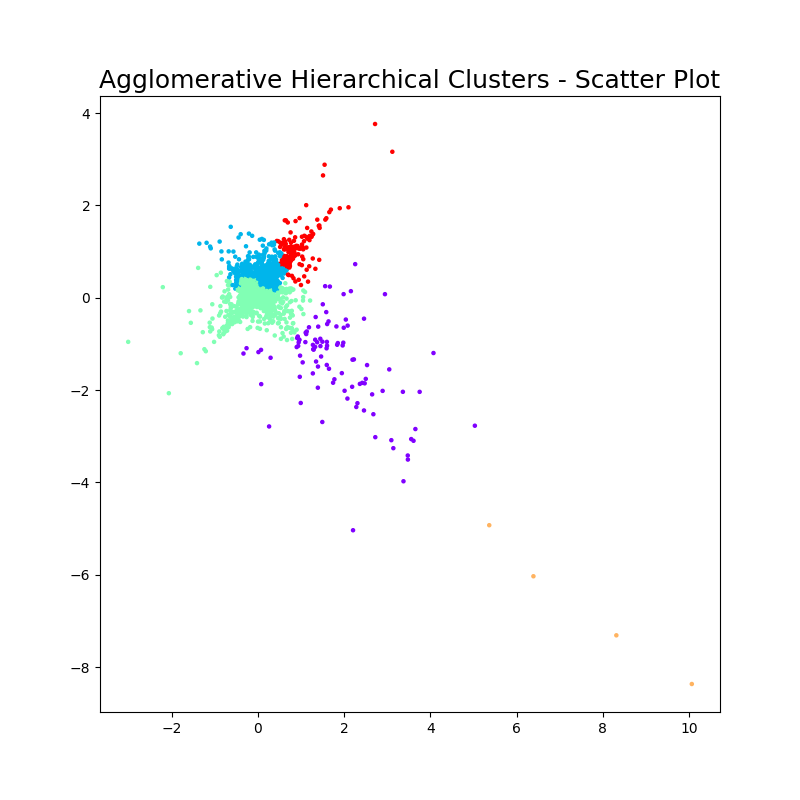

In [23]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(8, 8))
plt.scatter(raw_AV_df['Lyrics_Valence'], raw_AV_df['Lyrics_Arousal'], c = agc.fit_predict(raw_AV_df), cmap ='rainbow',s=5)
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()